<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hypothesis-Test-for-Significance" data-toc-modified-id="Hypothesis-Test-for-Significance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hypothesis Test for Significance</a></span></li><li><span><a href="#Uncertainty" data-toc-modified-id="Uncertainty-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uncertainty</a></span></li><li><span><a href="#Bayesian-Model" data-toc-modified-id="Bayesian-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bayesian Model</a></span></li></ul></div>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("style.mplstyle")  # A matplotlib "style" file to make plots look more like those in astro papers.

# Hypothesis Test for Significance

> **Our results are significant and not due to random chance**

## Setting up the Hypothesis Test
**Null hypothesis ($H_0$)**
: A testable hypothesis often stating that a feature of the **data is insigificant** and any observed due differences from what's expected is **due to random chance**. 
    
**Alternative hypothesis ($H_A$)**
: Any other hypothesis often stating that a feature of the **data is significant** and the differences are **not due to random chance**.

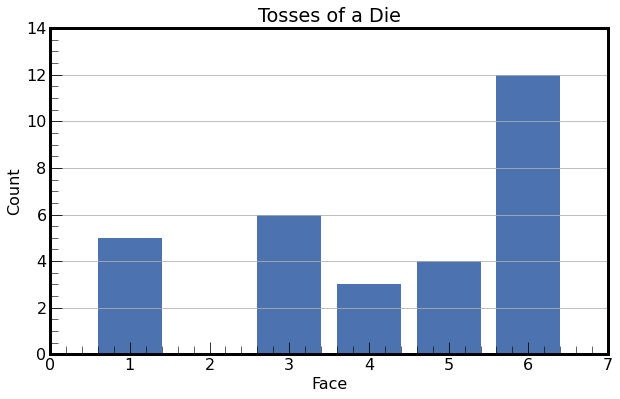

In [30]:
die_tosses = np.repeat(
    (1,2,3,4,5,6),
    (5,0,6,3,4,12)
)

faces, counts = np.unique(die_tosses, return_counts=True)
plt.bar(faces, counts)
plt.title("Tosses of a Die")
plt.xlabel("Face")
plt.ylabel("Count")
plt.grid(axis='y')

**Null hypothesis**:

The die is does not favor sixes and is consistent with **rolling a fair die.**
    
**Alternative hypothesis**:

The die favors sixes.

## Null Hypothesis Test

Also known as "Monte Carlo hypothesis test"

* **Empirical Sample**: A sample taken by using measurements. 
* **Simulated Sample**: A sample taken by using a process that produces synthetic measurements.

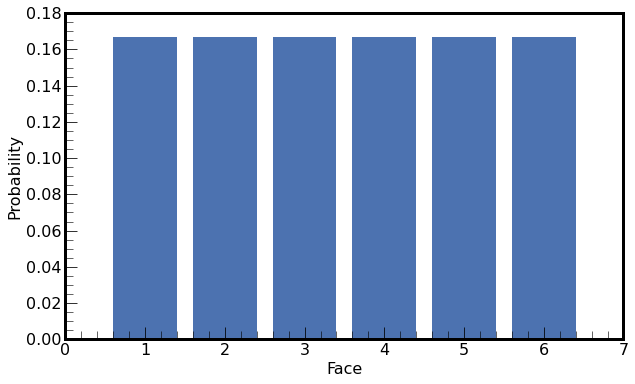

In [31]:
die_faces = (1, 2, 3, 4, 5, 6)
die_probs = [1/6] * 6

plt.bar(die_faces, die_probs)
plt.xlabel("Face")
plt.ylabel("Probability")
plt.show()

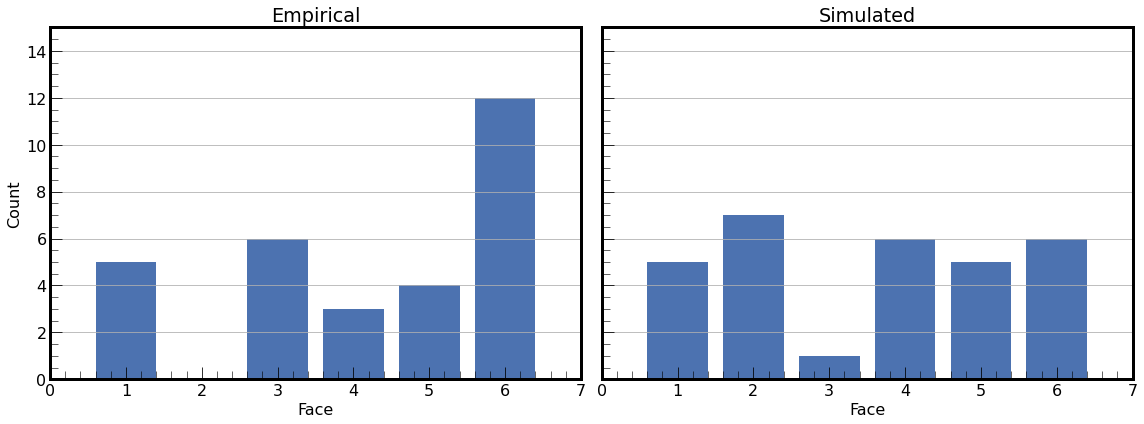

In [32]:
def roll(die_faces, die_probs, nrolls):
    roll = np.random.choice(die_faces, p=die_probs, size=nrolls)
    return roll

result = roll(die_faces, die_probs, nrolls=30)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

faces, counts = np.unique(die_tosses, return_counts=True)
axes[0].set_title("Empirical")
axes[0].bar(faces, counts)
axes[0].set_xlabel("Face")
axes[0].grid(axis='y')
axes[0].set_ylabel("Count")
axes[0].set_ylim(0, 15)

faces, counts = np.unique(result, return_counts=True) 
axes[1].set_title("Simulated")
axes[1].bar(faces, counts)
axes[1].set_xlabel("Face")
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [56]:
def calculate_stats(sample):
    """Returns the proportion of "6" in the given sample (rolls of a die)."""
    sample = np.array(sample)
    # Typically you can do 
    # np.sum(sample == 6) / len(sample)
    
    # However, doesn't the above looks like an average of something?
    return np.mean(sample == 6)

def simulate(die_faces, die_probs, nrolls, reps):
    """Simulate `nrolls` tosses of a die given the die faces and probabilities for each side. Repeat the simulation
    `reps` time calculating the statistics (as defined in `calculate_stats`) and return a numpy array of those statistics."""
    results = []
    
    for i in range(reps):
        sample = roll(die_faces, die_probs, nrolls)
        statistics = calculate_stats(sample)
        results.append(statistics)
        
    return np.array(results)

def plot(results):
    plt.hist(results, bins=np.arange(30)/30)
    plt.xlabel("Proportion of Sixes")
    plt.ylabel("Number of Simulations")
    plt.show()

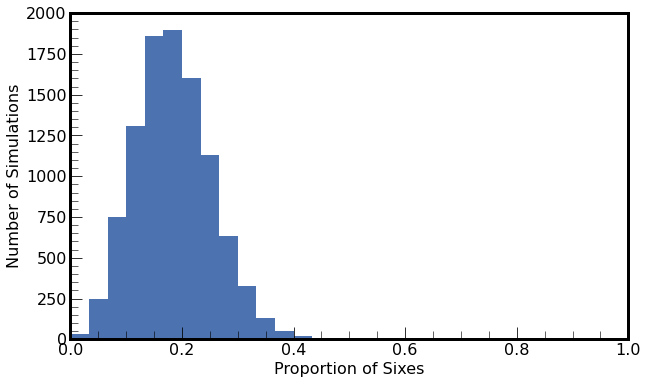

In [57]:
simulated_statistics = simulate(die_faces, die_probs, nrolls=30, reps=10000)
plot(simulated_statistics)

p-value = 0.0024


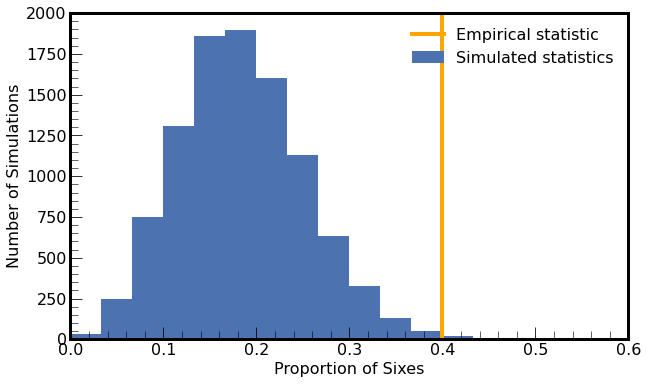

In [59]:
empirical_statistic = calculate_stats(die_tosses)
pvalue = np.mean(simulated_statistics >= empirical_statistic)
print(f"p-value = {pvalue}")

plt.hist(simulated_statistics, bins=np.arange(30)/30, label="Simulated statistics")
plt.axvline(empirical_statistic, color='orange', label="Empirical statistic")

plt.xlabel("Proportion of Sixes")
plt.ylabel("Number of Simulations")
plt.xlim(0, 0.6)
plt.legend()
plt.show()

## Bootstrap Hypothesis Test

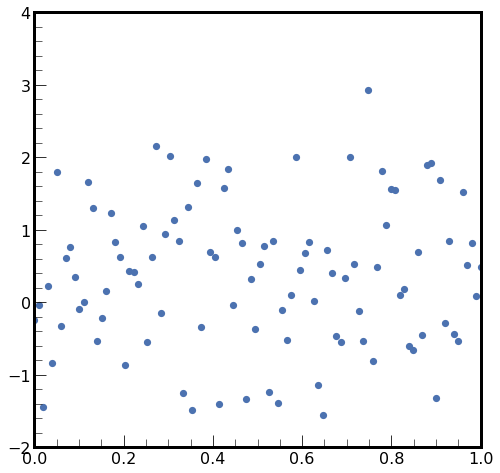

In [60]:
x = np.linspace(0, 1, 100)
y = x/2 + stats.norm().rvs(len(x))

plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.show()

**Null hypothesis**:


    
**Alternative hypothesis**: 
Slope is not zero


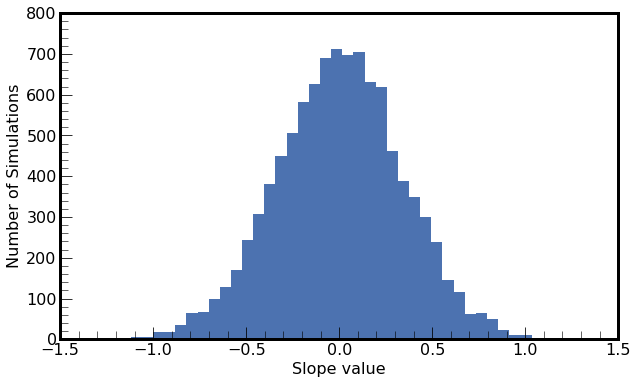

In [66]:
def calculate_slope(x, y):
    """Returns slope of least squares between x and y."""
    # This is a fancy analytical solution for least squares regression
    corr_xy = stats.pearsonr(x, y)[0]
    std_x = np.std(y)
    std_y = np.std(x)
    slope = corr_xy / (std_y / std_x)
    return slope

def simulate_bootstrap(x, y, reps):
    slopes = []
    for i in range(reps):
        # Sample with replacement
        # IMPORTANT: Each sample being is the same size as the original data
        sample_x = np.random.choice(x, len(x))
        sample_y = np.random.choice(y, len(y))
        
        slope = calculate_slope(sample_x, sample_y)
        slopes.append(slope)
        
    return np.array(slopes)

simulated_slopes = simulate_bootstrap(x, y, reps=10000)

plt.hist(simulated_slopes, bins=40)
plt.xlabel("Slope value")
plt.ylabel("Number of Simulations");

p-value = 0.3276


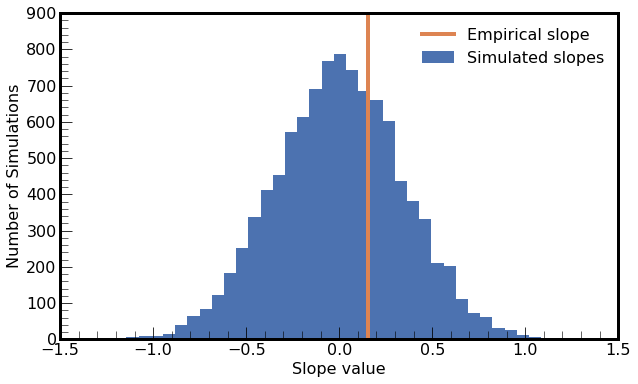

In [62]:
empirical_slope = calculate_slope(x, y)
pvalue = np.mean(simulated_slopes >= empirical_slope)
print(f"p-value = {pvalue}")

plt.hist(simulated_slopes, bins=40, label="Simulated slopes")
plt.axvline(empirical_slope, color='#dd8452', label="Empirical slope")

plt.xlabel("Slope value")
plt.ylabel("Number of Simulations")
plt.legend();

# Uncertainty

$$
Y = \mu \pm \sigma
$$

$$
\sigma \equiv \sqrt{\mathrm{Var}[Y]}
$$

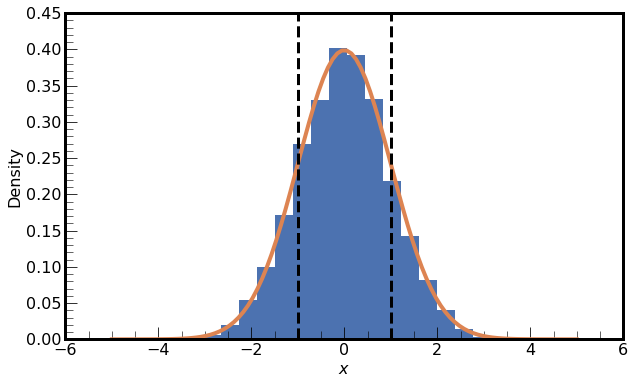

In [59]:
dist = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)

y = dist.rvs(10000)
plt.hist(y, bins=20, density=True)
plt.axvline(-np.std(y), c='k', ls='dashed', zorder=100, lw=3)
plt.axvline(np.std(y), c='k', ls='dashed', zorder=100, lw=3)
plt.plot(x, dist.pdf(x))
plt.xlabel("$x$")
plt.ylabel("Density")
plt.show()

## The Photon Noise &mdash; Why most uncertainties are Gaussian  

<small>https://people.csail.mit.edu/hasinoff/pubs/hasinoff-photon-2012-preprint.pdf</small>

$$
X \sim \mathrm{Poisson}(\lambda)
$$

---

$$
P(X=x) = \frac{e^{-\lambda} (\lambda)^x}{x!} = \frac{e^{-rt} (rt)^x}{x!}
$$

$$
\text{E}[X] = \lambda \qquad
\text{Var}[X] = \lambda
$$

### Sources of Poisson Noise
* **Photon noise**, photoexcitation from the observed object.
* **Phantom noise**, photoexcitation from the thermal fluctuation within the camera itself.

## Gaussian Error Propogation
$$
Y = \mu \pm \sigma \qquad Z = 0 \pm 1
$$

$$
Y = \mu + \sigma Z
$$

Calculate variance by monte carlo

Calculate variance by bootstrap


Text(0.5, 1.0, 'mean = 10.00; std = 1.00')

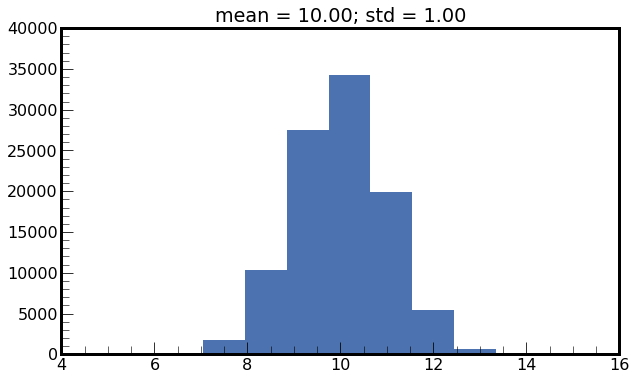

In [85]:
standard_normal_dist = stats.norm(loc=0, scale=1)
standard_normal_sample = standard_normal_dist.rvs(100000)

mu, sigma = 10, 1
Y = mu + sigma * standard_normal_sample
plt.hist(Y)
plt.title(
    f"mean = {np.mean(Y):.2f}; std = {np.std(Y):.2f}"
)

$$
X = \mu_x + \sigma_x Z_x \qquad Y = \mu_y + \sigma_y Z_y
$$

$$
X + Y = (\mu_x + \mu_y) + (\sigma_1Z_x + \sigma_2Z_y)
$$


Text(0.5, 1.0, 'mean = 300.00; std = 5.00')

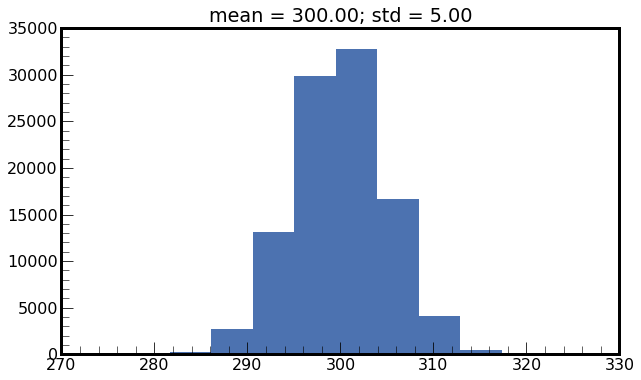

In [60]:
standard_normal_dist = stats.norm(loc=0, scale=1)
standard_normal_sample_x = standard_normal_dist.rvs(100000)
standard_normal_sample_y = standard_normal_dist.rvs(100000)

mu_x, sigma_x = 100, 3
mu_y, sigma_y = 200, 4



X_Y = (mu_x + mu_y) + sigma_x*standard_normal_sample_x + sigma_y*standard_normal_sample_y
plt.hist(X_Y)
plt.title(
    f"mean = {np.mean(X_Y):.2f}; std = {np.std(X_Y):.2f}"
)

# Bayesian Model